In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/Car_Price_Prediction.csv


In [2]:
# Importing essential packages and modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [4]:
# Loading the data set

df = pd.read_csv("/kaggle/input/car-price-prediction/Car_Price_Prediction.csv")

In [5]:
# Preview head of the df

df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [6]:
# Analyisis of data

In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [9]:
# Data set does not contain any null values

In [10]:
df.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


In [11]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission', 'Price'],
      dtype='object')

In [12]:
# Checking for duplicates

df.duplicated().sum()

0

In [13]:
# No duplicated values in this data set

In [14]:
df.nunique()

Make               5
Model              5
Year              22
Engine Size       36
Mileage          997
Fuel Type          3
Transmission       2
Price           1000
dtype: int64

In [15]:
# Check unique values

unique_val_df = df[['Make', 'Model', 'Year', 'Engine Size', 'Fuel Type', 'Transmission']]

for col in unique_val_df:
    print(unique_val_df[col].unique())

['Honda' 'Ford' 'BMW' 'Audi' 'Toyota']
['Model B' 'Model C' 'Model A' 'Model D' 'Model E']
[2015 2014 2006 2004 2000 2018 2021 2016 2007 2001 2019 2017 2010 2009
 2003 2012 2008 2002 2020 2011 2005 2013]
[3.9 1.7 4.1 2.6 3.4 2.7 1.3 2.  4.4 2.1 4.5 4.  3.1 1.1 4.2 3.  2.2 1.5
 2.9 1.  1.2 3.5 1.9 3.8 4.3 1.6 2.8 2.4 1.8 3.7 3.6 3.3 2.5 2.3 1.4 3.2]
['Petrol' 'Electric' 'Diesel']
['Manual' 'Automatic']


In [16]:
# EDA

# Count of each Make with Models
# Transmission Type Count
# Year manufactured distribution
# Price vs Model
# Price vs Year manufactured
# Price vs Engine size
# Price vs transmission Type
# Prices group by models (mean)
# Mean price group by models and transmissions
# Price vs Mileage
# Mileage vs Make and Model
# Price distribution for a model 

In [17]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission', 'Price'],
      dtype='object')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Honda'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Toyota')])

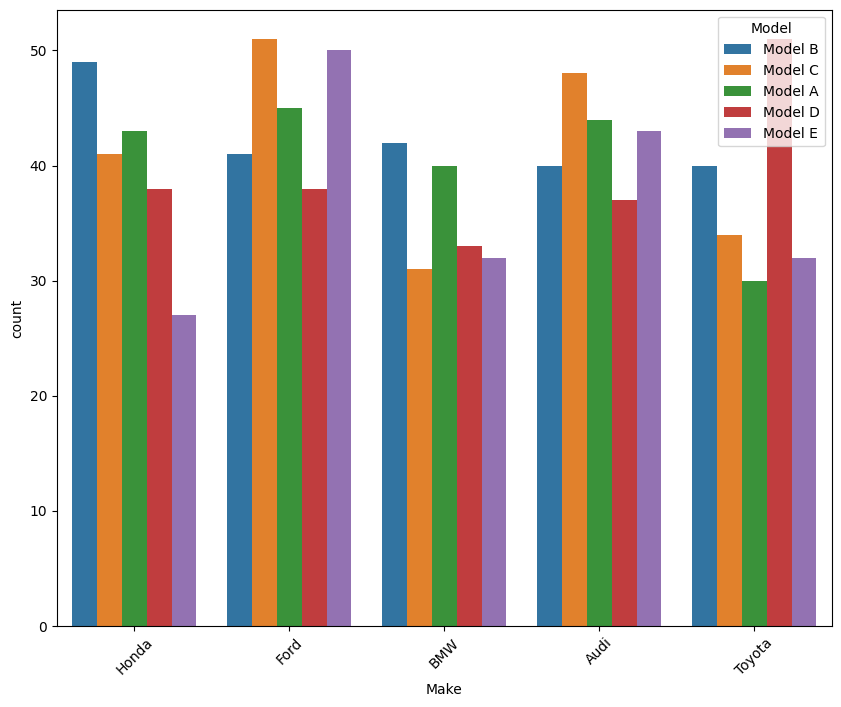

In [18]:
# Count of each Make with respective Models

plt.figure(figsize=(10,8))
sns.countplot(x='Make', data=df, hue='Model')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Honda'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Toyota')])

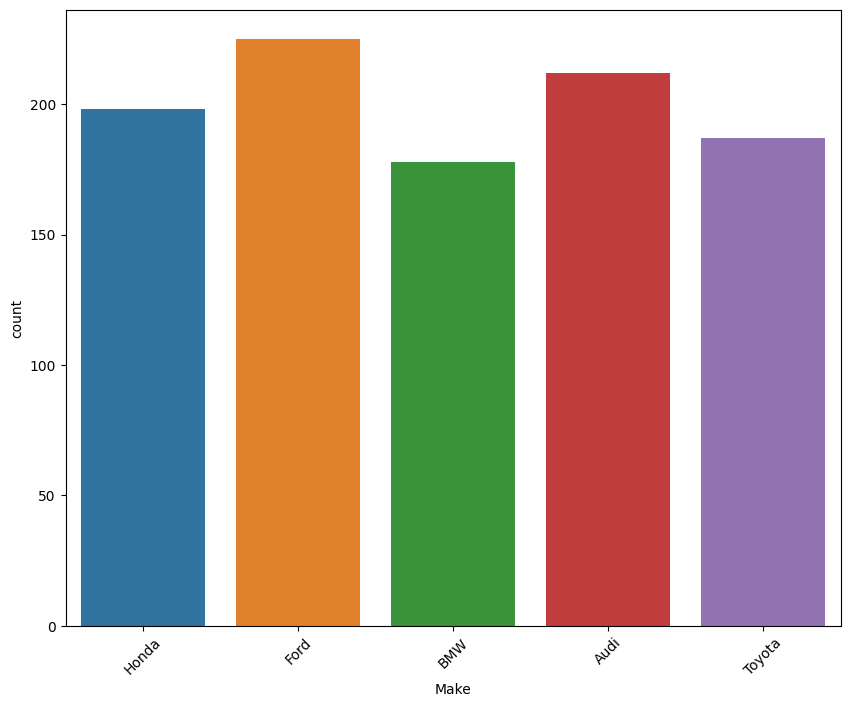

In [19]:
# Count of each Make 

plt.figure(figsize=(10,8))
sns.countplot(x='Make', data=df)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Manual'), Text(1, 0, 'Automatic')])

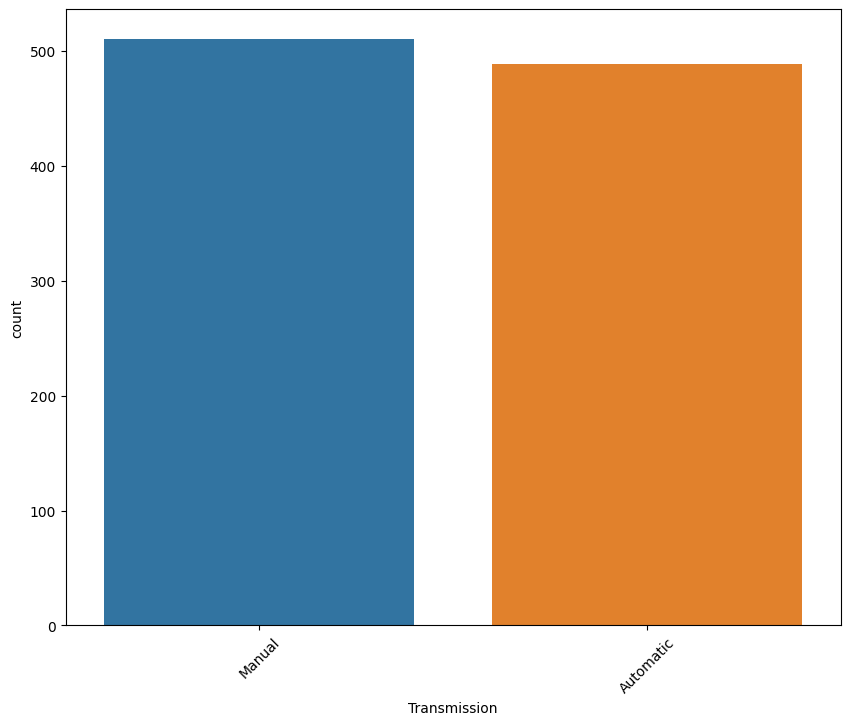

In [20]:
# Transmission type count

plt.figure(figsize=(10,8))
sns.countplot(x='Transmission', data=df)
plt.xticks(rotation=45)

In [21]:
# Transmission types are equally distributed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020'),
  Text(21, 0, '2021')])

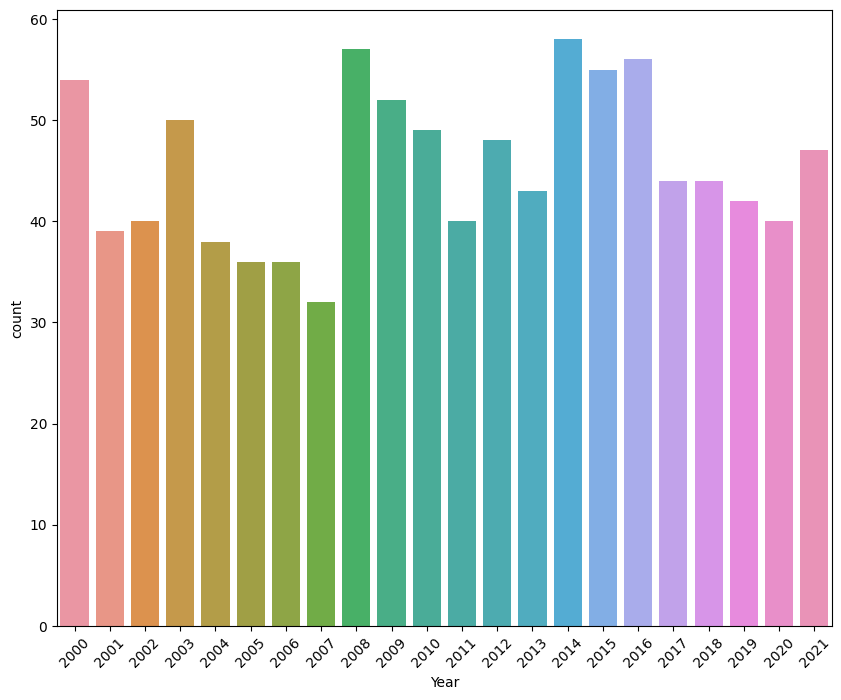

In [22]:
# Year manufactured distribution

plt.figure(figsize=(10,8))
sns.countplot(x='Year', data=df)
plt.xticks(rotation=45)

In [23]:
# Nothing is too abnormal about the year variable

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Model B'),
  Text(1, 0, 'Model C'),
  Text(2, 0, 'Model A'),
  Text(3, 0, 'Model D'),
  Text(4, 0, 'Model E')])

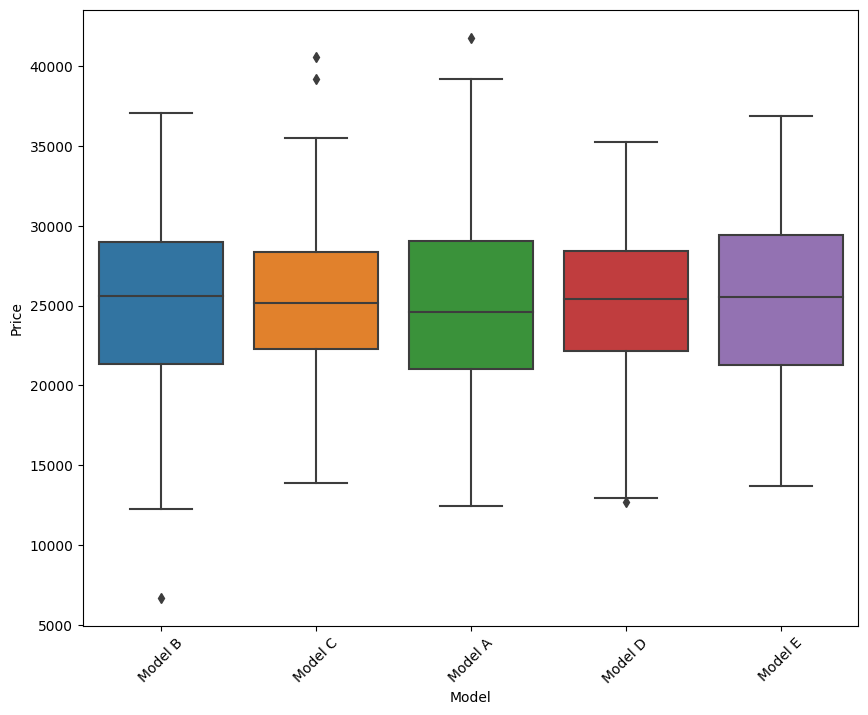

In [24]:
# Price vs Model

plt.figure(figsize=(10,8))
sns.boxplot(x='Model', y='Price', data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Honda'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Toyota')])

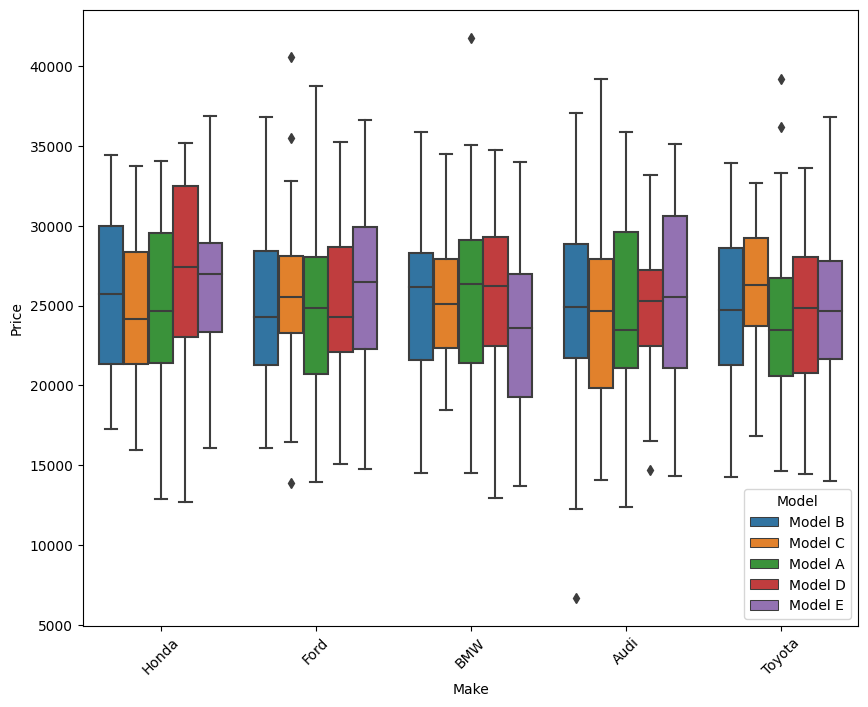

In [25]:
# There are some price outliers
# It is better to check by the Make since each make has multiple models


plt.figure(figsize=(10,8))
sns.boxplot(x='Make', y='Price', data=df, hue='Model')
plt.xticks(rotation=45)

In [26]:
# Outliers detected within the dataset

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

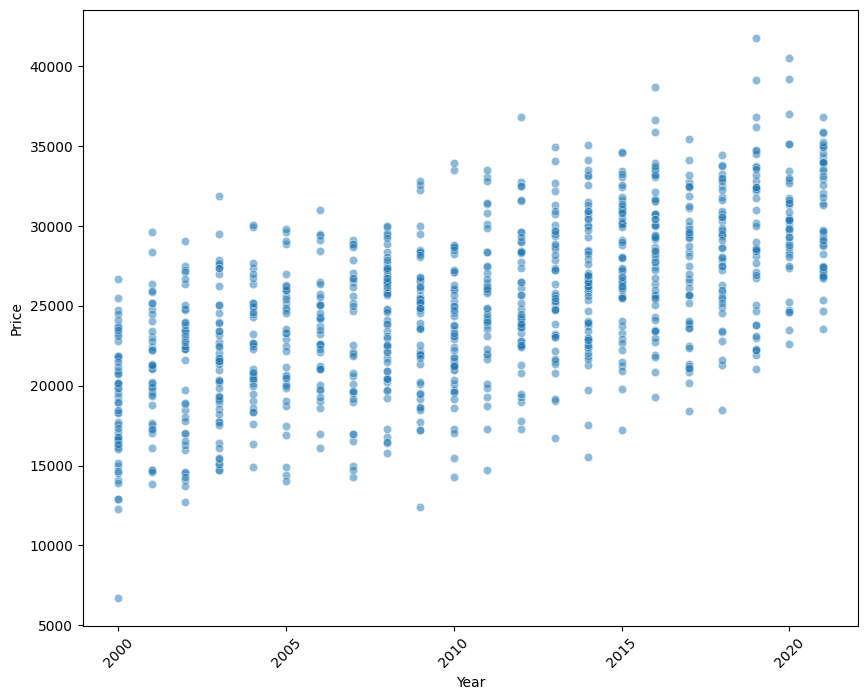

In [27]:
# Price vs Year manufactured

plt.figure(figsize=(10,8))
sns.scatterplot(x='Year', y='Price', data=df, alpha=0.5)
plt.xticks(rotation=45)

In [28]:
# Some outliers detected within the dataset
# New Vehicles tend to have higher prices

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0')])

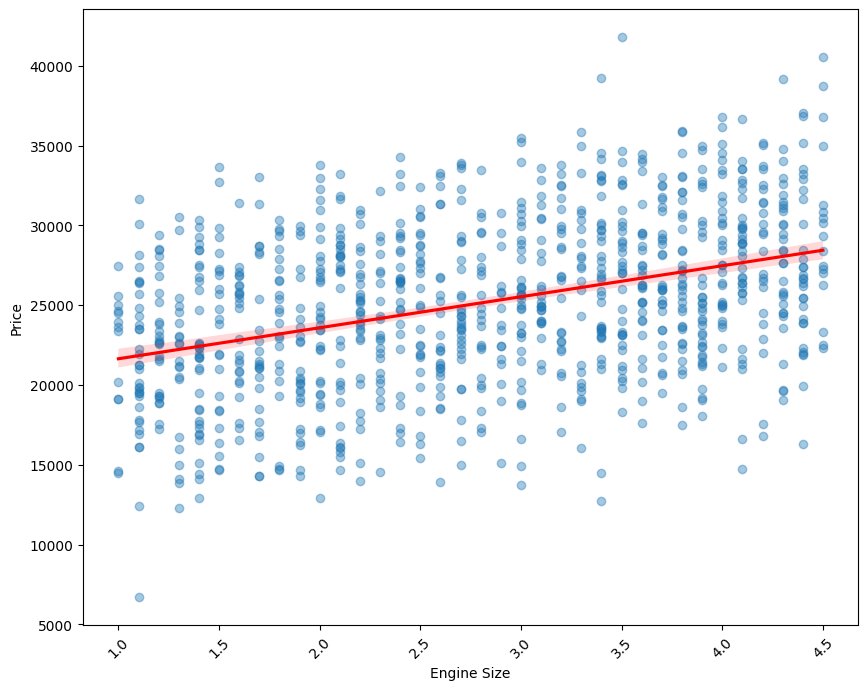

In [29]:
# Price vs Engine size

plt.figure(figsize=(10,8))
sns.regplot(x='Engine Size', y='Price', data=df, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.xticks(rotation=45)


In [30]:
# Price is higher for cars with larger engines

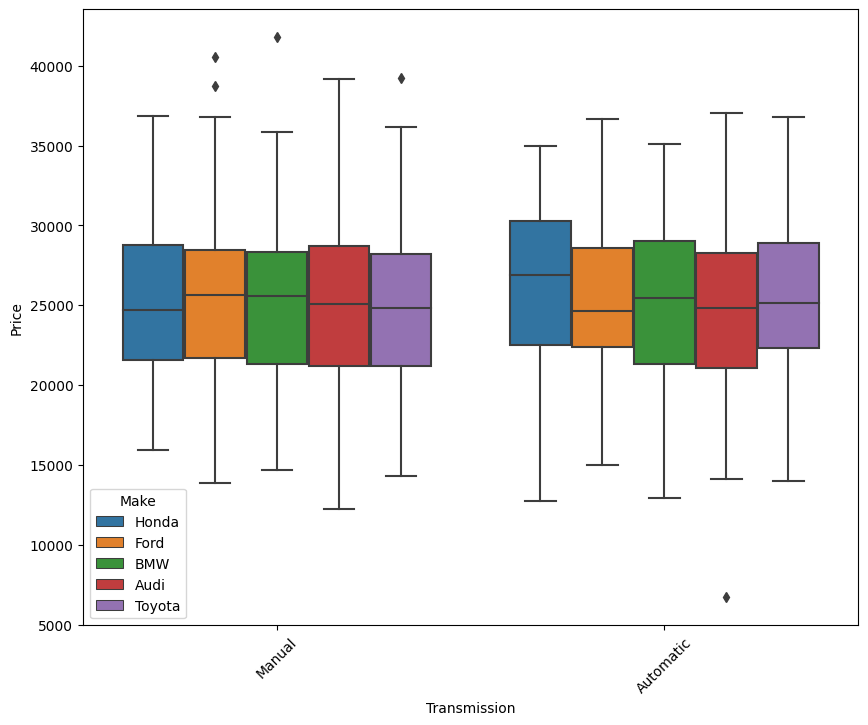

In [31]:
# Price vs transmission Type

plt.figure(figsize=(10,8))
sns.boxplot(x='Transmission', y='Price', data=df, hue='Make')
plt.xticks(rotation=45)
plt.show()


In [32]:
# There is no significant price variation based on transmission
# But a slight demand in price for Honda automatic cars

In [33]:
# Prices group by Make (mean)

grouped = df.groupby('Make')['Price'].mean()
grouped

Make
Audi      24663.819189
BMW       25062.164568
Ford      25329.455894
Honda     25702.154192
Toyota    24912.654883
Name: Price, dtype: float64

In [34]:
# Not much variation in average price of a car based on Make

In [35]:
# Mean price group by models and transmissions

grouped_mean_price_transmission = df.groupby(['Make', 'Transmission'])['Price'].mean()
grouped_mean_price_transmission

Make    Transmission
Audi    Automatic       24548.525421
        Manual          24752.211077
BMW     Automatic       25100.522075
        Manual          25017.258218
Ford    Automatic       25300.216897
        Manual          25362.280806
Honda   Automatic       26267.048300
        Manual          25101.954201
Toyota  Automatic       24999.404306
        Manual          24847.795502
Name: Price, dtype: float64

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000., 225000.]),
 [Text(-25000.0, 0, '−25000'),
  Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000'),
  Text(175000.0, 0, '175000'),
  Text(200000.0, 0, '200000'),
  Text(225000.0, 0, '225000')])

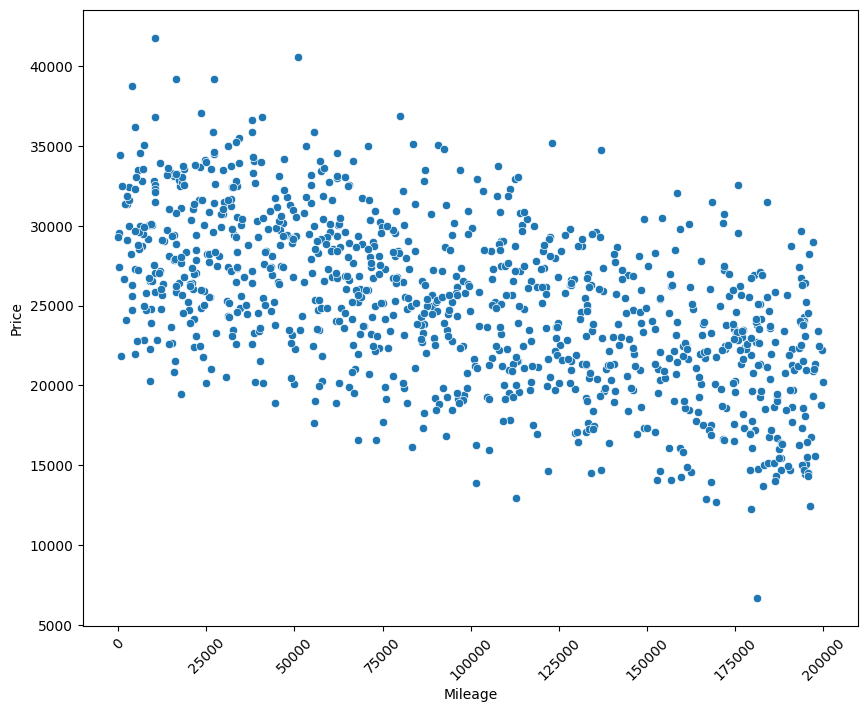

In [36]:
# Price vs Mileage

plt.figure(figsize=(10,8))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.xticks(rotation=45)

In [37]:
# Cars with less mileages has highest price tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020'),
  Text(21, 0, '2021')])

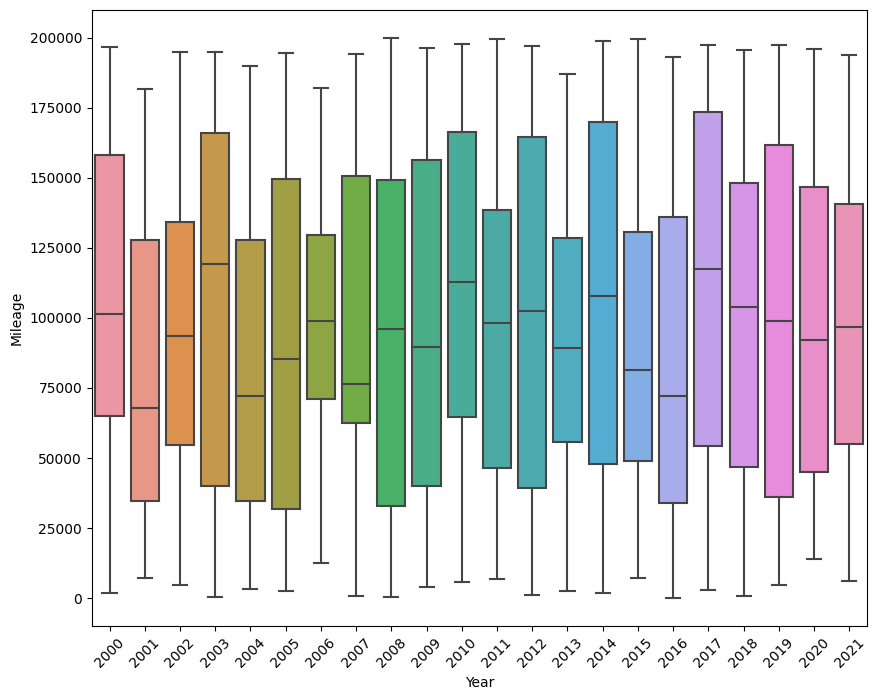

In [38]:
# Mileage vs year

plt.figure(figsize=(10,8))
sns.boxplot(x='Year', y='Mileage', data=df)
plt.xticks(rotation=45)

In [39]:
# Cars from 2003,2010,2012,2014 and 2017 tend to have higher mileages
# According to the chart older the car does not mean it has a higher mileage

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Honda'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Toyota')])

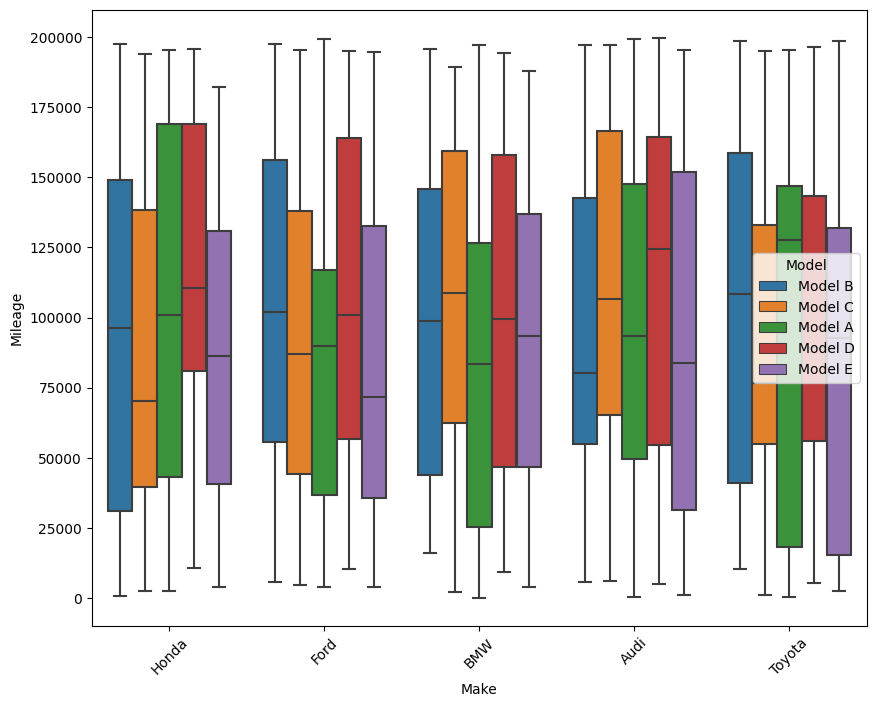

In [40]:
# Mileage vs Make and Model

plt.figure(figsize=(10,8))
sns.boxplot(x="Make", y="Mileage",data=df, hue="Model")
plt.xticks(rotation=45)

In [41]:
# Honda Model A and Model D tends to have the highest mileages
# Toyota cars tend to have lower mileages

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Honda'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Toyota')])

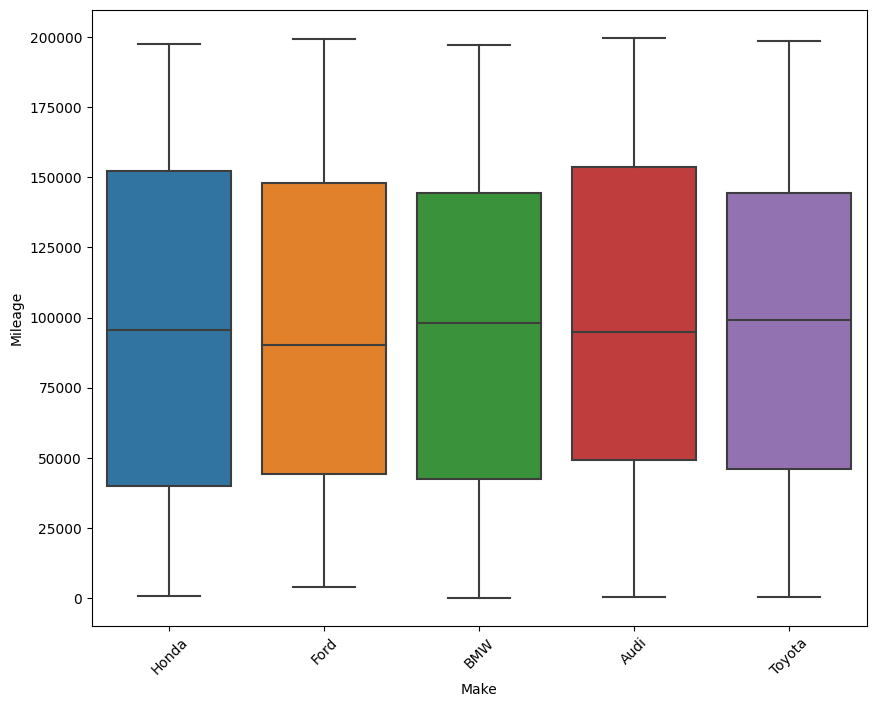

In [42]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Make", y="Mileage",data=df)
plt.xticks(rotation=45)

In [43]:
# Overall Audi cars tends to have a larger mileages

(array([-20000.,      0.,  20000.,  40000.,  60000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000')])

<Figure size 2000x1800 with 0 Axes>

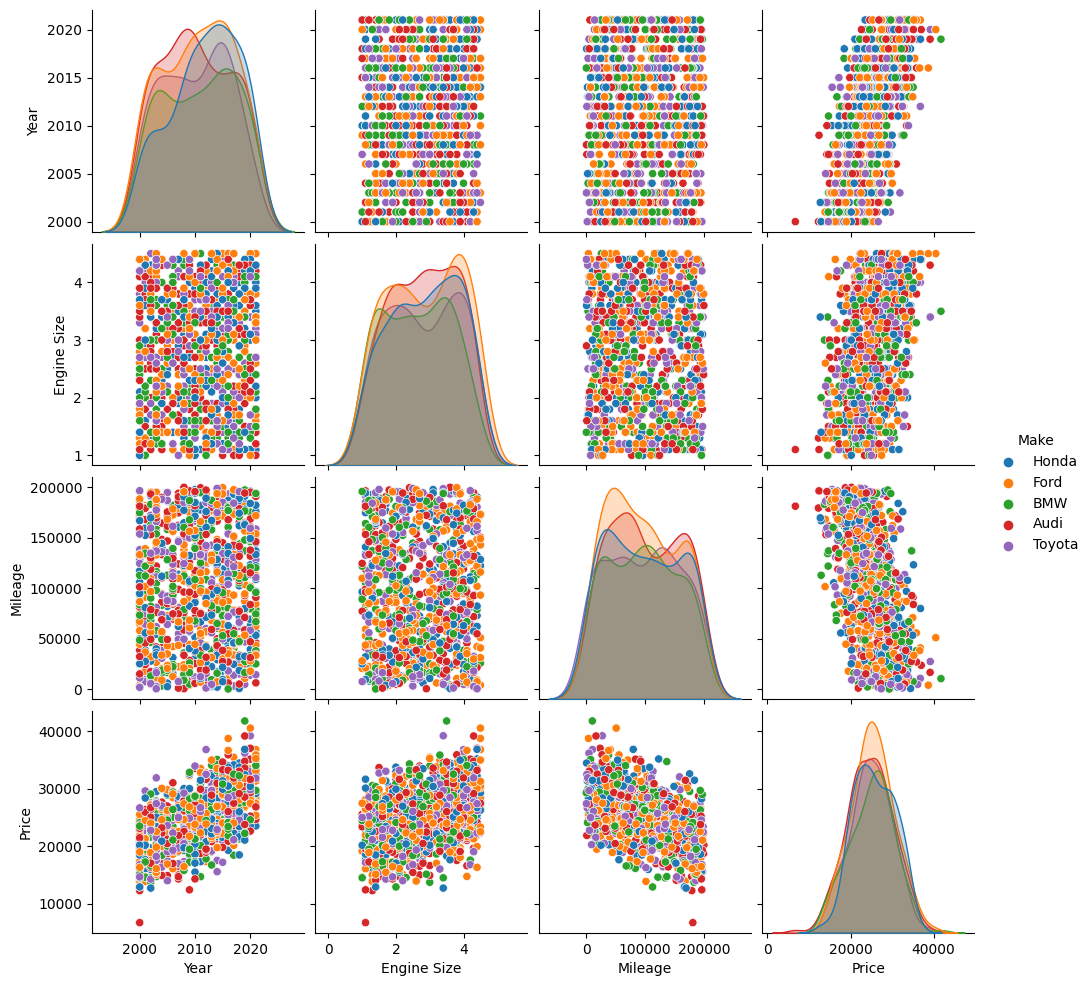

In [44]:
# Overview using pairplot

plt.figure(figsize=(20,18))
sns.pairplot(df[['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission', 'Price']], hue='Make')
plt.xticks(rotation=45)

In [45]:
# Correlation Heatmap

corr_matrix = df.corr(numeric_only=True)

corr_matrix

,Year,Engine Size,Mileage,Price
Year,1.000000,-0.012190,0.016376,0.609631
Engine Size,-0.012190,1.000000,-0.014815,0.383951
Mileage,0.016376,-0.014815,1.000000,-0.556560
Price,0.609631,0.383951,-0.556560,1.000000


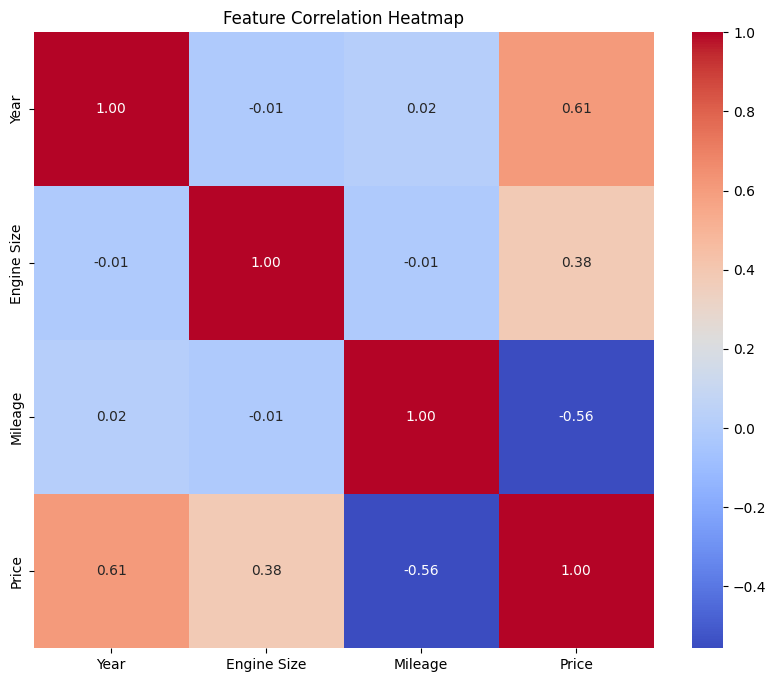

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [47]:
# Observations from the heatmap
# - Year and Price has a very positive correlation (New cars sells at higher prices)
# - Engine size and Price also has a positive correlation (Bigger the engine higher the price is)
# - Milleage and Price has a good negative correlation (Means if the Milleage is high, the price is also high)

# Final Observations from EDA

**Data Quality**
- 1000 Rows
- No missing data
- No duplicated values
- Some price outliers (Needs to be treated when training the machine learning model)
- Most of the variables are balanced and others are well distributed

**Observations and Interpretations**
- Most of the cars are in Ford brand
- All the five brands are fairly evenly distributed
- Manual and Automatic car types are evenly distributed within the database
- Years range from 2000 to 2021
- The number of cars manufactered per each year is normal across this range
- Some price outliers thoughout the dataset *This could be due to those vehicles are priced at unreasonably high  prices, data entry mistakes or damaged vehicles (lower prices)*
- Honda Model D shows the highest price variation and the highest prices among all the cars *This car could be more reliable or a luxarious one compared to other models*
- Newer cars are generally expensive compared to the older ones
- Cars with larger engines tend to slightly price higher *This could be due to the power that can be generated from these engines is higher*
- There is no major price difference between manual and automatic transmission
- But the Honda Automatic cars tend to have a slighly higher mean price *Honda automatic cars could be more relaiable and easy to use*
- Other makes have similar price avergae prices
- Larger the Mileage, lower the price is *This could be due to wornout or replaced parts and constant repairs due to high usage of these vehicles*
- 2003, 2010, 2012, 2014 and 2017 cars have higher Milleages
- This trend shows that older the car, it doesn't have higher milleages rather according to this dataset it is evident that new vehicles tend to have higher Milleages *This could be due to the fact that most of the newer models came out between 2010 and 2017 are more reliable and more durable compared older cars (except 2003)*
- Honda model A and D have higher milleages *Either these two vehicles could be more durable and reliable or less luxary, also these two models can be more fuel efficient compared to the other Honda Models*
- Toyota cars generally lower milleages *Due to less reliability or more luxary purpose vehicles compared to the other 'Makes'*
- Overall Audi cars tend to have higher Milleages
- Year and Price: strong positive correlation (+0.61) → newer cars are more expensive.
- Engine size and Price: moderate positive correlation (+0.38) → bigger engines cost more.
- Mileage and Price: moderate negative correlation (-0.56) → higher mileage reduces price.


# Machine Learning Model

In [48]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [49]:
# Loading data, already loaded

df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [50]:
df.shape

(1000, 8)

In [51]:
# Remove Outliers in Price column

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.65)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [52]:
df.shape

(980, 8)

<Axes: xlabel='Make', ylabel='Price'>

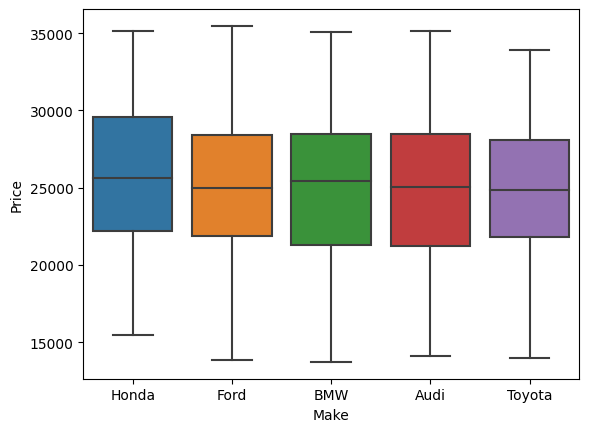

In [53]:
sns.boxplot(x='Make', y='Price', data=df)

In [54]:
# Now the outliers are properly treated

In [55]:
# Encoding Categorical values into numerical data

from sklearn.preprocessing import LabelEncoder

cat_cols = ['Make', 'Model', 'Fuel Type', 'Transmission']

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [56]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,30246.207931
1,2,2,2014,1.7,94799,1,0,22785.747684
2,1,1,2006,4.1,98385,1,1,25760.290347
3,3,1,2015,2.6,88919,1,0,25638.003491
4,3,2,2004,3.4,138482,2,0,21021.386657


In [57]:
# Splitting into X and y datasets

X = df[['Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission']]
y = df['Price']

In [58]:
# Splitting into train and test splits

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 123)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(686, 5)
(294, 5)
(686,)
(294,)


In [60]:
# Initializing the Model

xgbr = xg.XGBRegressor(objective = 'reg:linear', n_estimators = 1000, seed = 123)

In [61]:
# Fitting the data to the model

xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [62]:
# Getting the predictions

y_pred = xgbr.predict(X_test)

In [63]:
# Root Mean Squared Error (RMSE) Calculation

rmse = np.sqrt(MSE(y_test, y_pred))
print(rmse)

2484.7306300097066


In [64]:
df.describe()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,1.975510,1.960204,2010.630612,2.787245,97714.491837,0.985714,0.509184,25040.117932
std,1.403851,1.394374,6.232332,1.017192,59171.551906,0.819701,0.500171,4893.679359
min,0.000000,0.000000,2000.000000,1.000000,56.000000,0.000000,0.000000,13720.047257
25%,1.000000,1.000000,2005.000000,1.900000,45922.750000,0.000000,0.000000,21618.441776
50%,2.000000,2.000000,2011.000000,2.800000,95082.000000,1.000000,1.000000,25163.793523
75%,3.000000,3.000000,2016.000000,3.700000,148977.750000,2.000000,1.000000,28693.748583
max,4.000000,4.000000,2021.000000,4.500000,199867.000000,2.000000,1.000000,35473.201485


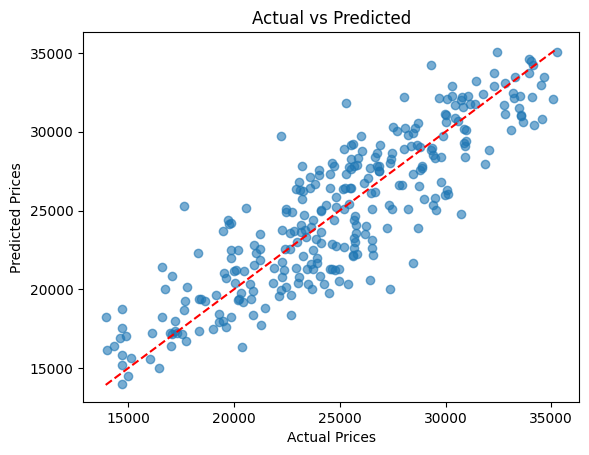

In [65]:
# Plotting Actual vs Predicted Price

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [66]:
# Cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print('Average CV RMSE: ', scores.mean())

Average CV RMSE:  -2469.1312838830904


In [67]:
# Hyper parameter tuning using Grid Search CV
# Stage 1 => n_estimators & learning_rate

from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [10, 20, 50, 100, 500, 1000, 2500, 5000]
}

grid = GridSearchCV(xg.XGBRegressor(objective='reg:squarederror', seed=123),
                    param_grid,
                    scoring='neg_root_mean_squared_error',
                    cv=5,
                    verbose=1
                   )
grid.fit(X_train, y_train)
print('Best Params: ', grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params:  {'learning_rate': 0.01, 'n_estimators': 500}


In [68]:
# Stage 2 => tree depth and min child weight

param_grid_stage2 = {
    'max_depth': [3, 5, 7, 10, 25],
    'min_child_weight': [1, 3, 5, 6, 7, 8, 9, 10]
}

grid2 = GridSearchCV(xg.XGBRegressor(objective='reg:squarederror', seed=123, learning_rate=0.01, n_estimators=500),
                    param_grid_stage2,
                    scoring='neg_root_mean_squared_error',
                    cv=5,
                    verbose=1
                   )
grid2.fit(X_train, y_train)
print('Best Params grid 2: ', grid2.best_params_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params grid 2:  {'max_depth': 5, 'min_child_weight': 8}


In [69]:
# Initializing the Model Again

xgbr_tuned = xg.XGBRegressor(objective = 'reg:linear', n_estimators = 500, learning_rate=0.01, max_depth=5, min_child_weight=8, seed = 123)

In [70]:
# Fitting the data again to the model

xgbr_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [71]:
# Getting the predictions

y_pred_tuned = xgbr_tuned.predict(X_test)

In [72]:
# Root Mean Squared Error (RMSE) Calculation

rmse = np.sqrt(MSE(y_test, y_pred_tuned))
print(rmse)

2220.0299365417504
